<a href="https://colab.research.google.com/github/zakyzuf/PCVK_Ganjil_2023/blob/main/Week07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum Modul 6 – Filter Spasial

1. Buatlah fungsi konvolusi menggunakan algoritma yang telah dijelaskan pada Bagian C, tanpa
menggunakan library atau metode konvolusi dari OpenCV.
2. Berikut merupakan langkah-langkah yang dapat dilakukan:<ul>
<li>a. Buat notebook baru pada google colab, dan beri nama Week7.ipynb. Simpan Salinan pada akun github seperti pada modul sebelumnya.</li>
<li>b. Akses file yang terdapat pada drive dan import beberapa library yang dibutuhkan</li>
</ul>

In [5]:
from google.colab import drive

drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ol><ul><li>c. Buatlah fungsi konvolusi. Catatan: parameter yang digunakan boleh dimodifikasi.
Misal, hanya menggunakan parameter image dan kernel saja, atau image, kernel, dan
padding.</li></ul></ol>

In [6]:
def convolution2d(image, kernel, stride, padding):
  if padding > 0:
  # Jika padding lebih dari 0, tambahkan padding ke citra dengan nilai nol.
      image_padded = np.zeros((image.shape[0] + 2*padding, image.shape[1] + 2*padding))

      # Menempatkan citra asli ke citra dengan padding
      image_padded[padding:-padding, padding:-padding] = image
  else:
      # Jika tidak, gunakan citra asli.
      image_padded = image

  # Membuat citra keluaran dengan dimensi yang sesuai berdasarkan padding, stride, dan kernel.
  output_height = int((image_padded.shape[0] - kernel.shape[0])/stride) + 1
  output_width = int((image_padded.shape[1] - kernel.shape[1])/stride) + 1
  result = np.zeros((output_height, output_width)).astype(np.float32)

  # Melakukan operasi konvolusi
  for x in range(0, image_padded.shape[1] - kernel.shape[1] + 1, stride):
      for y in range(0, image_padded.shape[0] - kernel.shape[0] + 1, stride):
        # Mengalikan elemen dari bagian citra dengan kernel dan menjumlahkannya.
        # Hasilnya ditempatkan pada matriks output.
        result[y//stride, x//stride] = np.sum(image_padded[y:y+kernel.shape[0], x:x+kernel.shape[1]] * kernel)

  return result

<ol><ul>
<li>d. Load citra yang akan diproses dan ubah menjadi citra keabuan</li>

<li>e. Tentukan kernel yang akan digunakan</li>

<li>f. Memanggil fungsi konvolusi</li></ul></ol>

3. Buat Image Filter untuk Average filter, low pass filter, high pass filter, dan beberapa filter

In [8]:
img = cv.imread('/content/drive/MyDrive/female.tiff')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

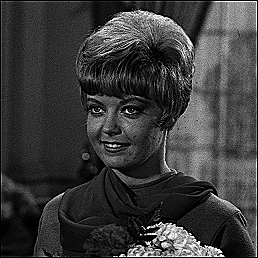

In [10]:
# Image Sharpen
kernel_sharpen = np.array([[0,-1,0],
                          [-1,5,-1],
                           [0,-1,0]])

result = convolution2d(img_gray,kernel_sharpen,1,2)
cv2_imshow(result)

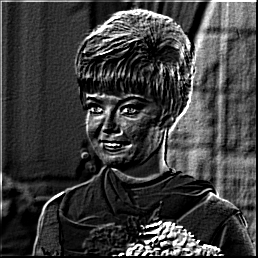

In [11]:
# Image Emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1,  1, 1],
                          [ 0,  1, 2]])

result = convolution2d(img_gray,kernel_emboss,1,2)
cv2_imshow(result)

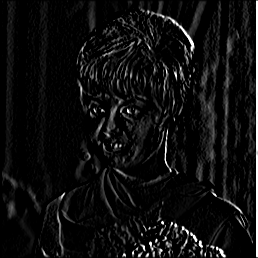

In [13]:
# Image Left Sobel Edge Detection
kernel_leftSobel = np.array([[1, 0, -1],
                          [2,  0, -2],
                          [ 1,  0, -1]])

result = convolution2d(img_gray,kernel_leftSobel,1,2)
cv2_imshow(result)

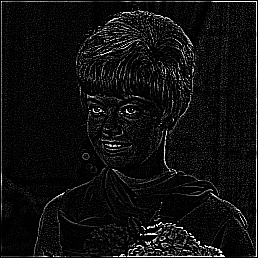

In [14]:
# Image Canny Edge Detection
kernel_canny = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

result = convolution2d(img_gray,kernel_canny,1,2)
cv2_imshow(result)

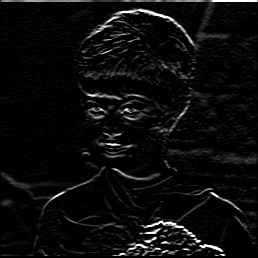

In [18]:
# Image Prewitt Edge Detection
kernel_prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])

result = convolution2d(img_gray,kernel_prewitt,1,2)
cv2_imshow(result)

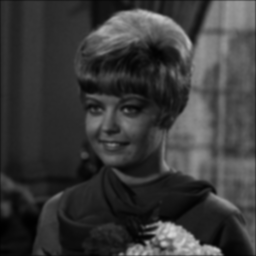

In [19]:
# Image 5x5 Gaussian Blur
kernel_gaussian5 = (1 / 256.0) * np.array([[1, 4, 6, 4, 1],
                                   [4, 16, 24, 16, 4],
                                   [6, 24, 36, 24, 6],
                                   [4, 16, 24, 16, 4],
                                   [1, 4, 6, 4, 1]])

result = convolution2d(img_gray,kernel_gaussian5,1,2)
cv2_imshow(result)

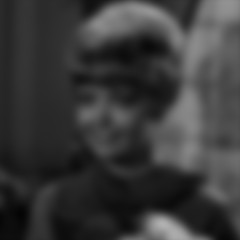

In [20]:
# Image 21x21 Gaussian Blur
kernel_size = 21

sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

result = convolution2d(img_gray,gauss_kernel,1,2)

cv2_imshow(result)

# Tugas Praktikum
Diketahui dataset KTP dengan kondisi citra yang berbeda. Lakukan perbaikan melalui implementasi teknik filterisasi dan detection setiap citra. Terapkan juga histogram equalization dan operasi aritmatika sebagai Teknik pendukung perbaikan citra KTP.

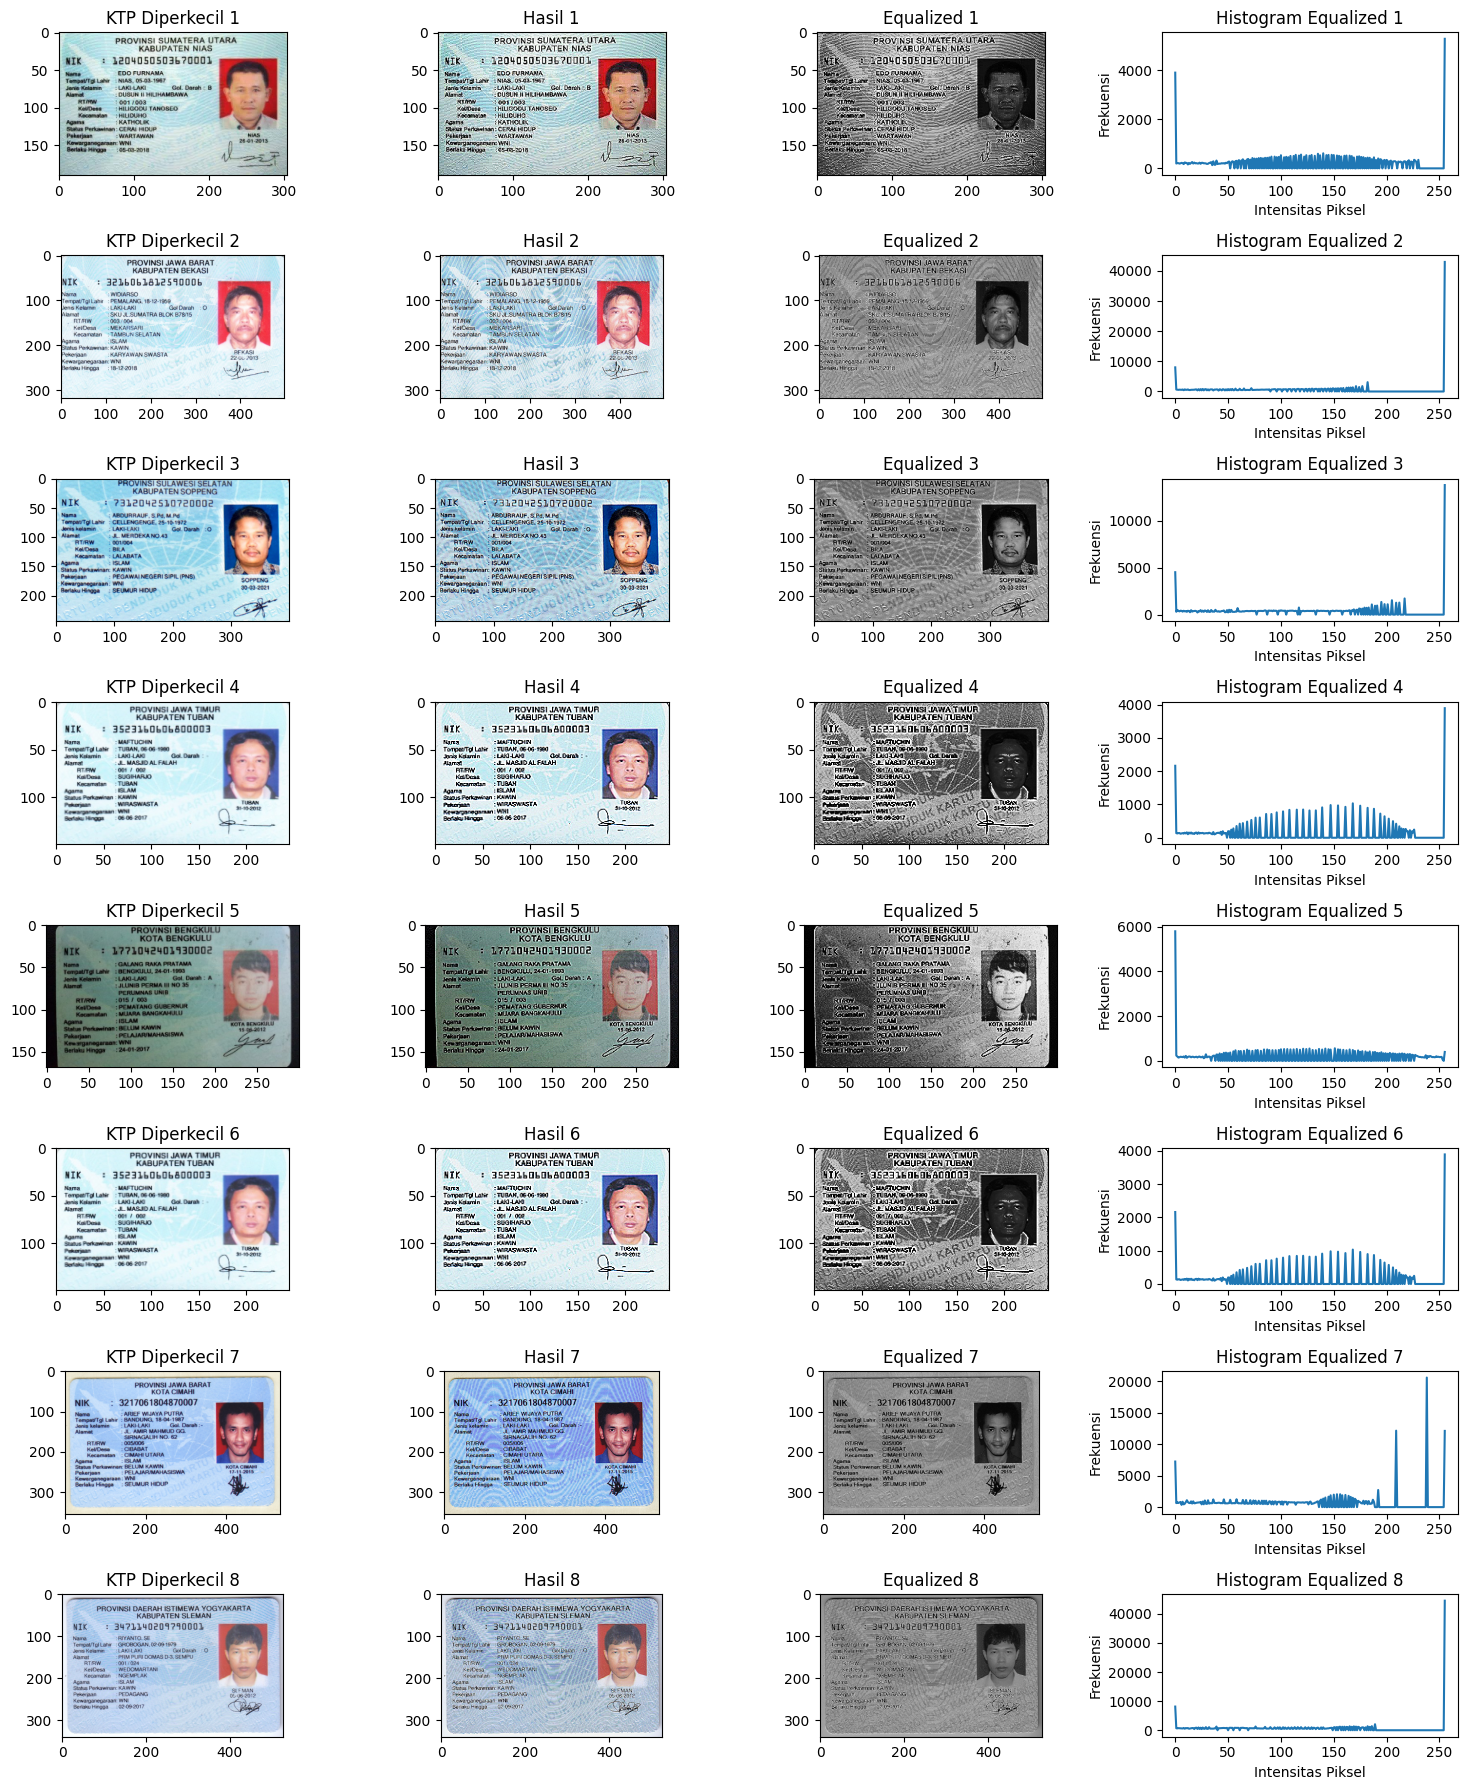

In [21]:
import os

folder_path = '/content/drive/MyDrive//PCVK/KTP_More'

# Dapatkan daftar file citra dalam folder
ktp_files = [file for file in os.listdir(folder_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Fungsi untuk penyesuaian kecerahan
def Brightness(image, value):
    hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)
    h, s, v = cv.split(hsv)
    v = cv.add(v, value)
    v = np.clip(v, 0, 255)
    hsv = cv.merge((h, s, v))
    return cv.cvtColor(hsv, cv.COLOR_HSV2BGR)

# Kernel untuk mengasah gambar
kernel_sharpen = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])


# Buat grid untuk menampilkan gambar
num_rows = len(ktp_files)
num_cols = 4
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Iterasi melalui gambar-gambar KTP
for i, ktp_file in enumerate(ktp_files):
    ktp_path = os.path.join(folder_path, ktp_file)
    ktp_image = cv.imread(ktp_path)

    # Ubah ukuran gambar KTP
    ktp_image_resized = cv.resize(ktp_image, (0, 0), fx=0.5, fy=0.5)

    # Terapkan penyesuaian Brightness
    brightness_adjusted = Brightness(ktp_image_resized, -10)

    # Terapkan Sharpen
    result = cv.filter2D(brightness_adjusted, -1, kernel_sharpen)

    # Lakukan histogram equalization
    result_gray = cv.cvtColor(result, cv.COLOR_BGR2GRAY)
    result_equalized = cv.equalizeHist(result_gray)
    result_equalized_color = cv.cvtColor(result_equalized, cv.COLOR_GRAY2BGR)

    # Tampilkan gambar asli dengan label
    axs[i, 0].imshow(cv.cvtColor(ktp_image_resized, cv.COLOR_BGR2RGB))
    axs[i, 0].set_title(f'KTP Diperkecil {i+1}')

    # Tampilkan gambar yang telah diolah dengan label
    axs[i, 1].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB,))
    axs[i, 1].set_title(f'Hasil {i+1}')

    # Tampilkan gambar hasil equalisasi dengan label
    axs[i, 2].imshow(cv.cvtColor(result_equalized_color, cv.COLOR_BGR2RGB))
    axs[i, 2].set_title(f'Equalized {i+1}')

    # Hitung histogram gambar hasil equalisasi
    hist_equalized = cv.calcHist([result_equalized], [0], None, [256], [0, 256])

    # Tampilkan histogram pada kolom ke-4 dengan label
    axs[i, 3].plot(hist_equalized)
    axs[i, 3].set_title(f'Histogram Equalized {i+1}')
    axs[i, 3].set_xlabel('Intensitas Piksel')
    axs[i, 3].set_ylabel('Frekuensi')

# Tampilkan hasil keseluruhan
plt.tight_layout()
plt.show()